# INSTALAR LIBRERIAS

In [ ]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy

## IMPORTAR LIBRERIAS/BIBLIOTECA

In [8]:
import snowflake.connector
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

### CONEXION A LA BASE

In [9]:
conn = snowflake.connector.connect(
    user='broc95',
    password='1234567Aa',
    account='pd72300.us-east4.gcp',
    database='DATA',
    schema='CONSTRUCCION', 
    warehouse='COMPUTE_WH'  
)

### OBTENER NOMBRE DE LAS TABLAS

In [10]:
cursor = conn.cursor()
cursor.execute("SHOW TABLES")
tables = [table[1] for table in cursor.fetchall()]


### CARGAR TODOS LOS DATOS EN UN DATAFRAME

In [12]:
dfs = {}
for table in tables:
    query = f'SELECT * FROM "{table}"'
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [col[0] for col in cursor.description]
    dfs[table] = pd.DataFrame(data, columns=columns)

### CERRAR CONEXION

In [13]:
cursor.close()
conn.close()

### MOSTRAR RESUMEN DE DATAFRAME

In [15]:
for table, df in dfs.items():
    print(f"Tabla: {table}")
    print(df.head())
    print()

Tabla: Compra
   ID_Compra  Cantidad              Proveedor        Pagado      Fecha  \
0          1         2             Homecenter  Parcialmente 2020-12-10   
1          2         2  Minerales Estalactita            No 2021-04-16   
2          3        18  Minerales Estalactita            Si 2020-05-21   
3          4         8  Bricolajes La Alameda            Si 2020-12-17   
4          5        19     Cementos El Dorado            No 2021-03-07   

   ID_Proyecto  ID_MaterialConstruccion  
0          281                       20  
1           38                        4  
2          331                       14  
3          152                       20  
4          117                       15  

Tabla: Lider
   ID_Lider  Nombre Primer_Apellido Segundo_Apellido  Salario  \
0         1   Nadia          Ocampo            Godoy   860539   
1         2   Jorge         Caceres            Ortiz   399053   
2         3   Diana          Rivera            Arias   427428   
3         4  Ca

### MOSTRAR ESTADISTICAS DESCRIPTIVAS DE CADA TABLA


In [16]:
for table, df in dfs.items():
    print(f"Tabla: {table}")
    print(df.describe()) 
    print()

Tabla: Compra
         ID_Compra     Cantidad                          Fecha  ID_Proyecto  \
count  1499.000000  1499.000000                           1499  1499.000000   
mean    750.649767    10.425617  2020-09-26 10:58:59.959973376   205.143429   
min       1.000000     1.000000            2020-01-01 00:00:00     1.000000   
25%     375.500000     5.000000            2020-05-12 12:00:00   105.000000   
50%     751.000000    10.000000            2020-09-20 00:00:00   206.000000   
75%    1125.500000    16.000000            2021-02-10 00:00:00   306.500000   
max    1500.000000    20.000000            2021-06-28 00:00:00   400.000000   
std     433.262718     5.697683                            NaN   116.122122   

       ID_MaterialConstruccion  
count              1499.000000  
mean                 11.012008  
min                   1.000000  
25%                   6.000000  
50%                  11.000000  
75%                  17.000000  
max                  21.000000  
std       

### MOSTRAR EL INFO DEL DF 

In [21]:
for table, df in dfs.items():
    print(f"Tabla: {table}")
    print(df.info())
    print()

Tabla: Compra
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID_Compra                1499 non-null   int64         
 1   Cantidad                 1499 non-null   int64         
 2   Proveedor                1499 non-null   object        
 3   Pagado                   1499 non-null   object        
 4   Fecha                    1499 non-null   datetime64[ns]
 5   ID_Proyecto              1499 non-null   int64         
 6   ID_MaterialConstruccion  1499 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 82.1+ KB
None

Tabla: Lider
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_Lider            

### MOSTRAR DATOS SHAPE DF

In [23]:
for table, df in dfs.items():
    print(f"Tabla: {table}")
    print(df.shape)
    print()

Tabla: Compra
(1499, 7)

Tabla: Lider
(50, 10)

Tabla: MaterialConstruccion
(21, 4)

Tabla: Proyecto
(400, 13)

Tabla: Tipo
(5, 5)



### MOSTRAR CONJUNTO DE DATOS ALEATOREOS

In [25]:
for table, df in dfs.items():
    print(f"Tabla: {table}")
    print(df.sample(5))
    print()

Tabla: Compra
      ID_Compra  Cantidad              Proveedor        Pagado      Fecha  \
1245       1247        15  Bricolajes La Alameda            Si 2020-05-19   
162         163        13                  JUMBO            No 2020-09-13   
992         994         9     Cementos El Dorado            No 2020-01-03   
0             1         2             Homecenter  Parcialmente 2020-12-10   
246         247         9                  JUMBO            Si 2020-09-05   

      ID_Proyecto  ID_MaterialConstruccion  
1245           80                       21  
162           325                        4  
992           153                       21  
0             281                       20  
246           298                        7  

Tabla: Lider
    ID_Lider    Nombre Primer_Apellido Segundo_Apellido  Salario  \
39        40  Maradona         Arteaga         Figueroa   334030   
33        34      Bart          Rivera            Ortiz   447023   
31        32     Libia          Pel

### MOSTRAR VALORES NULL

In [26]:
for table, df in dfs.items():
    print(f"Tabla: {table}")
    print(df.isnull().sum())
    print()

Tabla: Compra
ID_Compra                  0
Cantidad                   0
Proveedor                  0
Pagado                     0
Fecha                      0
ID_Proyecto                0
ID_MaterialConstruccion    0
dtype: int64

Tabla: Lider
ID_Lider               0
Nombre                 0
Primer_Apellido        0
Segundo_Apellido       0
Salario                0
Ciudad_Residencia      0
Cargo                  0
Clasificacion          0
Documento_Identidad    0
Fecha_Nacimiento       0
dtype: int64

Tabla: MaterialConstruccion
ID_MaterialConstruccion    0
Nombre_Material            0
Importado                  0
Precio_Unidad              0
dtype: int64

Tabla: Proyecto
ID_Proyecto                 0
Fecha_Inicio                0
Constructora                0
Numero_Banos                0
Numero_Habitaciones         0
Banco_Vinculado             0
Porcentaje_Cuota_Inicial    0
Ciudad                      0
Clasificacion               0
Acabados                    0
Serial            

### MOSTRAR GRAFICA DE VARIABLES CATEGORICAS DE COMPRA

In [41]:
df_compra = dfs['Compra']
print(df_compra.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID_Compra                1499 non-null   int64         
 1   Cantidad                 1499 non-null   int64         
 2   Proveedor                1499 non-null   object        
 3   Pagado                   1499 non-null   object        
 4   Fecha                    1499 non-null   datetime64[ns]
 5   ID_Proyecto              1499 non-null   int64         
 6   ID_MaterialConstruccion  1499 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 82.1+ KB
None


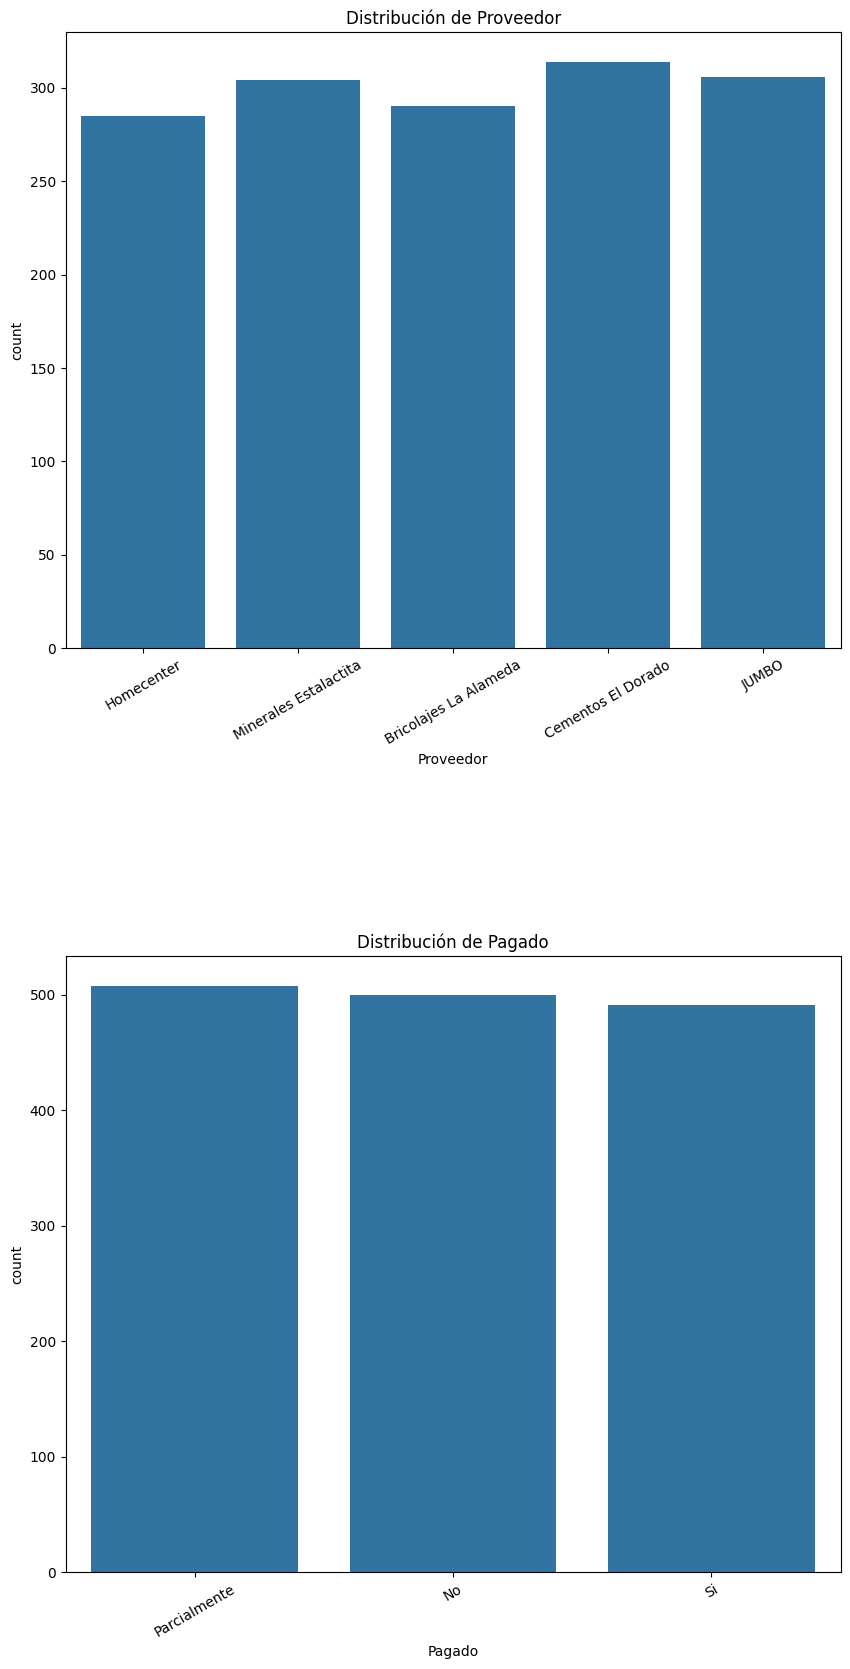

In [51]:
col_cat = ['Proveedor', 'Pagado']

fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10, 10 * len(col_cat)))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df_compra, ax=ax[i])  
    ax[i].set_title(f'Distribución de {col}')
    ax[i].tick_params(axis='x', rotation=30)

plt.show()

### GRAFICA V CATEGORICAS LIDER

In [44]:
df_lider = dfs['Lider']
print(df_lider.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_Lider             50 non-null     int64         
 1   Nombre               50 non-null     object        
 2   Primer_Apellido      50 non-null     object        
 3   Segundo_Apellido     50 non-null     object        
 4   Salario              50 non-null     int64         
 5   Ciudad_Residencia    50 non-null     object        
 6   Cargo                50 non-null     object        
 7   Clasificacion        50 non-null     float64       
 8   Documento_Identidad  50 non-null     object        
 9   Fecha_Nacimiento     50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 4.0+ KB
None


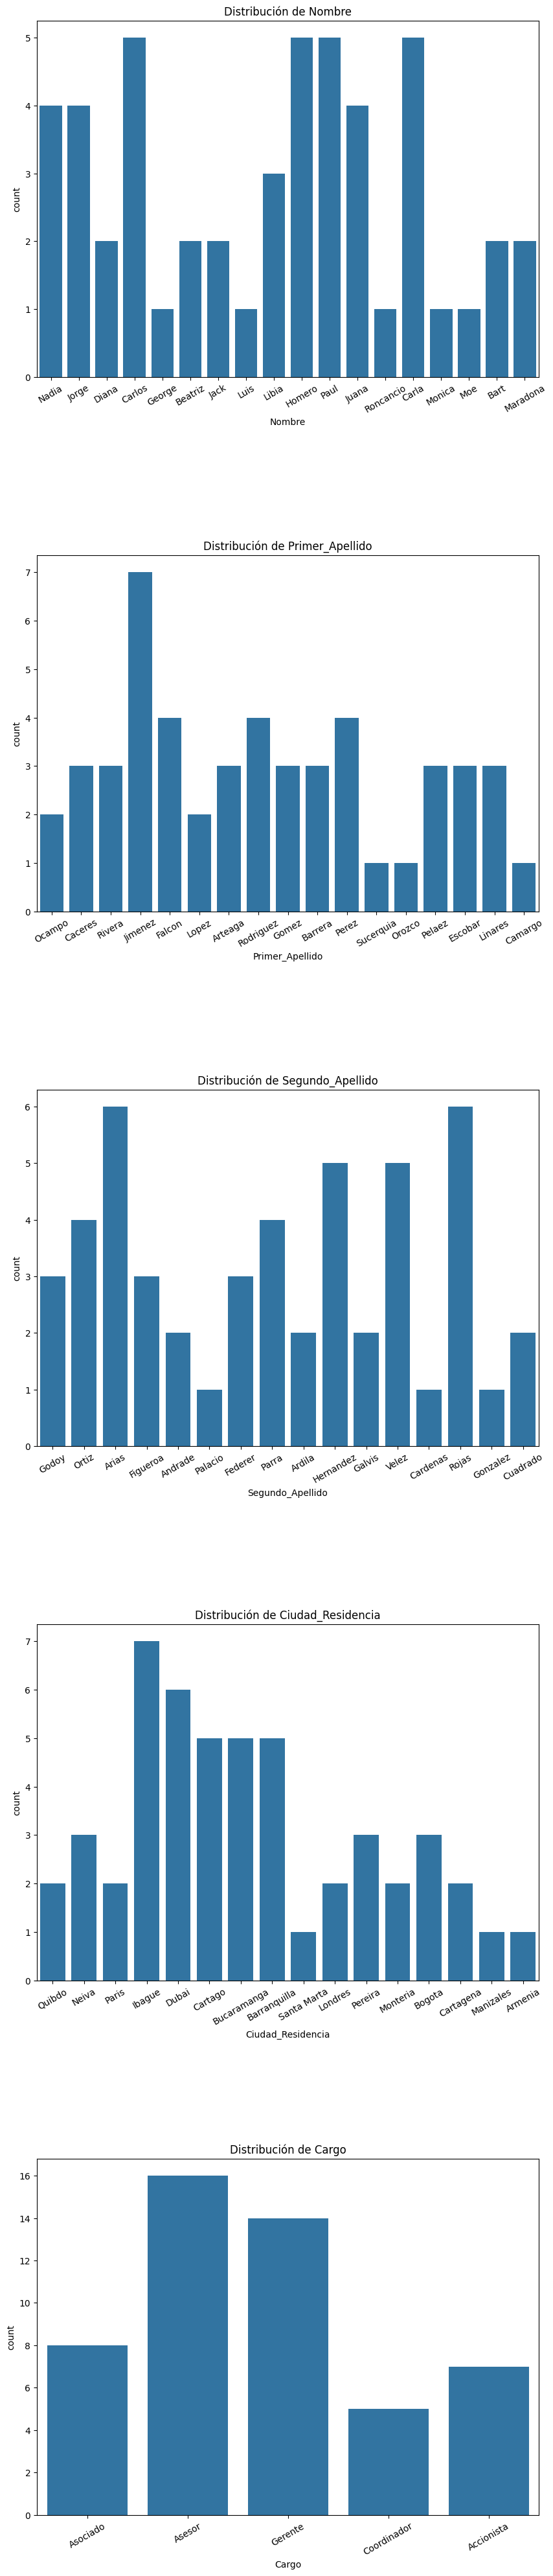

In [50]:
col_cat = ['Nombre', 'Primer_Apellido', 'Segundo_Apellido', 'Ciudad_Residencia', 'Cargo']

fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10, 10 * len(col_cat)))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df_lider, ax=ax[i]) 
    ax[i].set_title(f'Distribución de {col}')
    ax[i].tick_params(axis='x', rotation=30)

plt.show()

### GRAFICA VARIABLE CATEGORICA DE MATERIALES DE CONSTRUCCION

In [49]:
df_mConstruccion = dfs['MaterialConstruccion']
print(df_mConstruccion.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID_MaterialConstruccion  21 non-null     int64 
 1   Nombre_Material          21 non-null     object
 2   Importado                21 non-null     object
 3   Precio_Unidad            21 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 804.0+ bytes
None


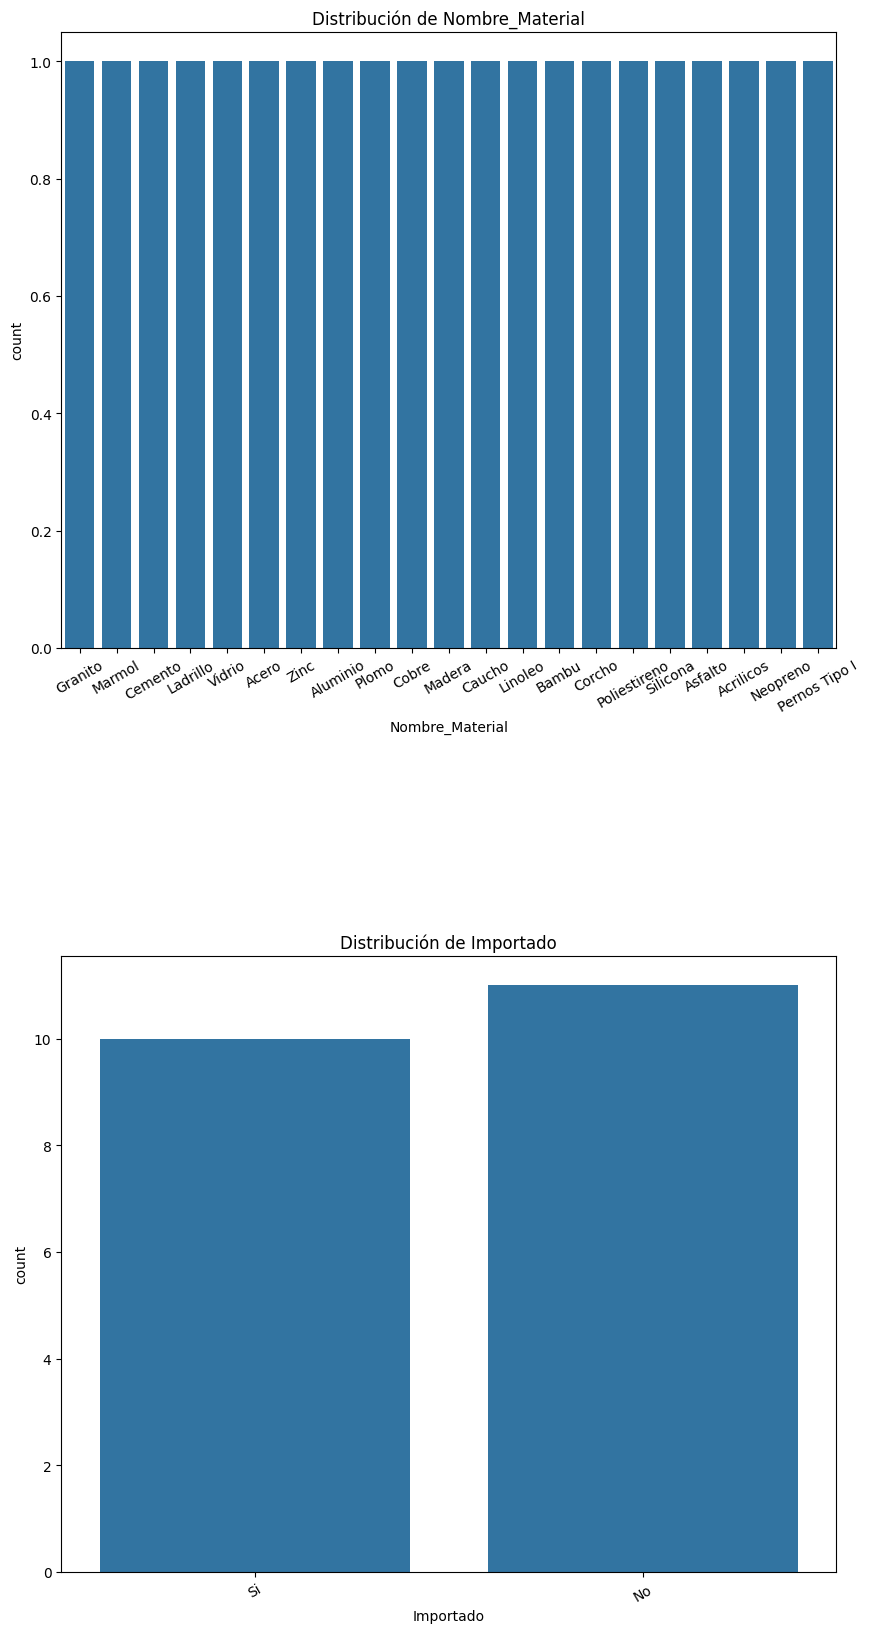

In [54]:
col_cat = ['Nombre_Material', 'Importado']

fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10, 10 * len(col_cat)))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df_mConstruccion, ax=ax[i])  
    ax[i].set_title(f'Distribución de {col}')
    ax[i].tick_params(axis='x', rotation=30)

plt.show()

### GRAFICA V CATEGORICAS PARA TABLA PROYECTO

In [55]:
df_proyecto = dfs['Proyecto']
print(df_proyecto.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID_Proyecto               400 non-null    int64         
 1   Fecha_Inicio              400 non-null    datetime64[ns]
 2   Constructora              400 non-null    object        
 3   Numero_Banos              400 non-null    float64       
 4   Numero_Habitaciones       400 non-null    float64       
 5   Banco_Vinculado           400 non-null    object        
 6   Porcentaje_Cuota_Inicial  400 non-null    float64       
 7   Ciudad                    400 non-null    object        
 8   Clasificacion             400 non-null    object        
 9   Acabados                  400 non-null    object        
 10  Serial                    400 non-null    object        
 11  ID_Tipo                   400 non-null    int64         
 12  ID_Lider              

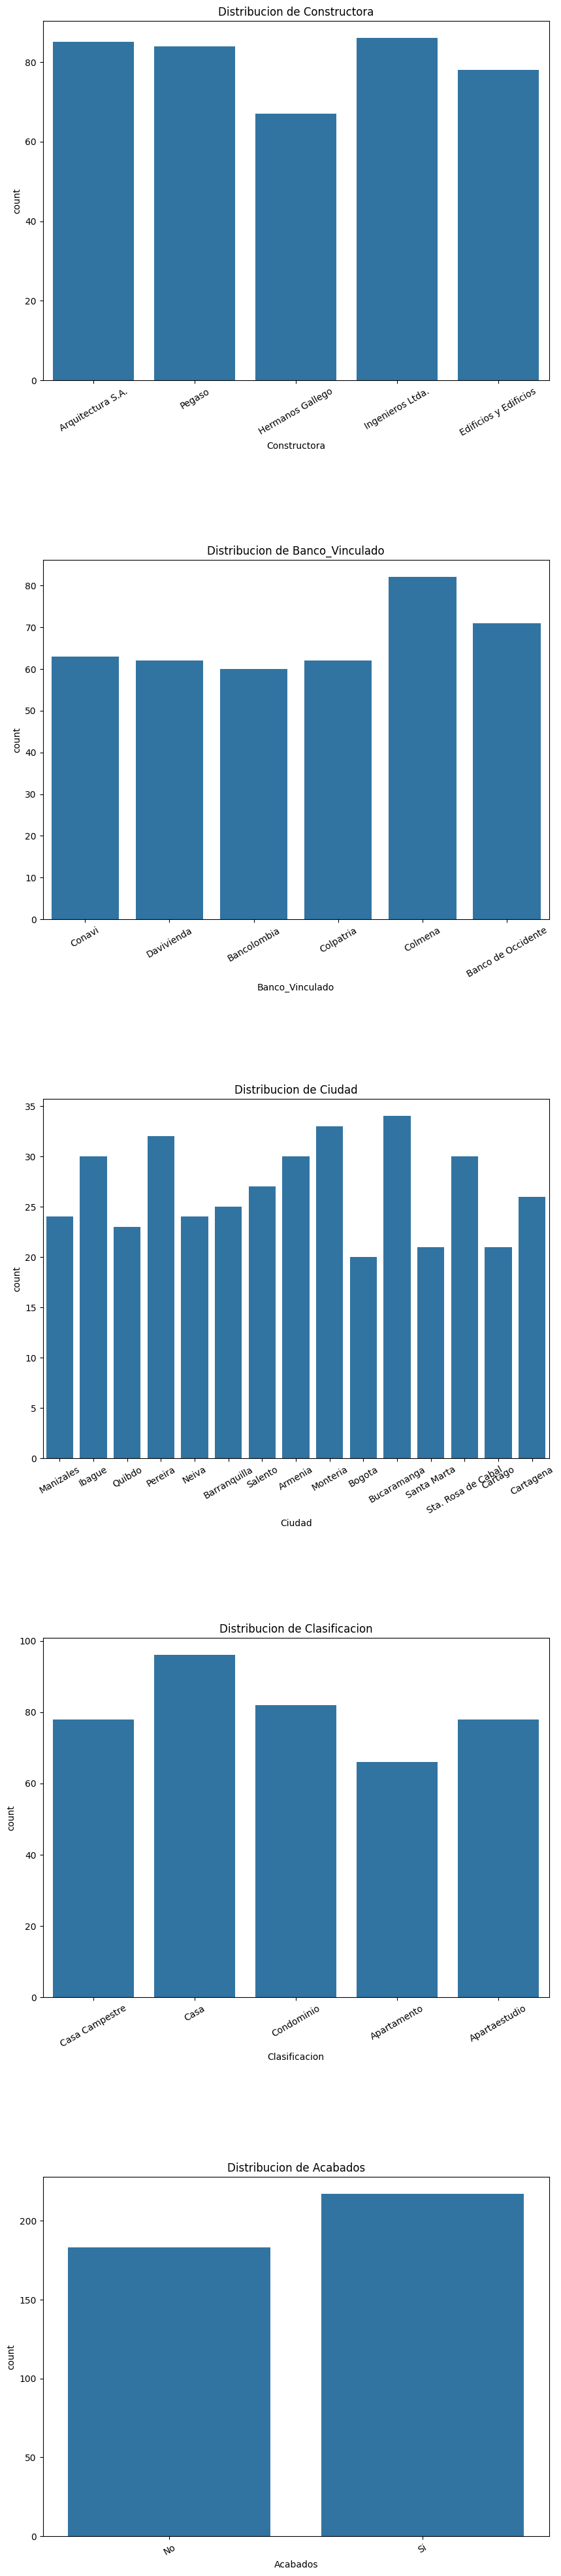

In [57]:
col_cat = ['Constructora', 'Banco_Vinculado', 'Ciudad', 'Clasificacion', 'Acabados']

fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10, 10 * len(col_cat)))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df_proyecto, ax=ax[i])
    ax[i].set_title(f'Distribucion de {col}')
    ax[i].tick_params(axis='x', rotation=30)

plt.show()

### LIMPIEZA DE TABLA DE LIDER

In [ ]:
df_lider.drop(columns=['Segundo_Apellido', 'Primer_Apellido', 'Nombre', 'ID_Lider', 'Fecha_Nacimiento'],inplace=True)

In [70]:
df_lider.columns

Index(['Salario', 'Ciudad_Residencia', 'Cargo', 'Clasificacion',
       'Documento_Identidad'],
      dtype='object')

### VARIABLES NUMERICAS

In [72]:
df_lider.describe()

,Salario,Clasificacion
count,50.000000,50.0000
mean,466686.500000,3.7400
std,252876.846274,1.7357
min,1071.000000,1.0000
25%,334030.000000,2.2500
50%,447023.000000,4.0000
75%,619499.250000,5.0000
max,874145.000000,6.0000


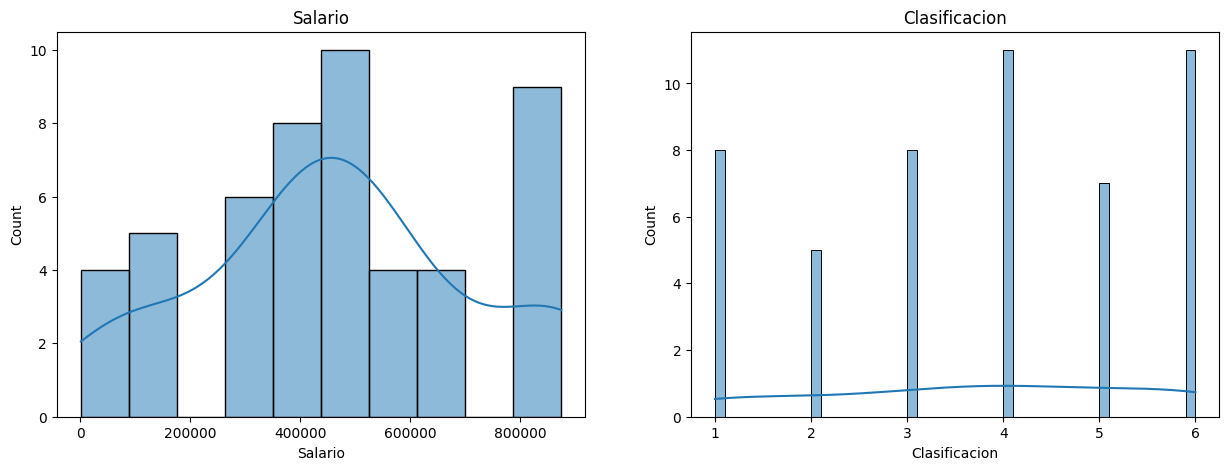

In [76]:
col_num = ['Salario', 'Clasificacion']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'Salario':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=df_lider, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

In [77]:
df_lider['Clasificacion'].describe()

count    50.0000
mean      3.7400
std       1.7357
min       1.0000
25%       2.2500
50%       4.0000
75%       5.0000
max       6.0000
Name: Clasificacion, dtype: float64

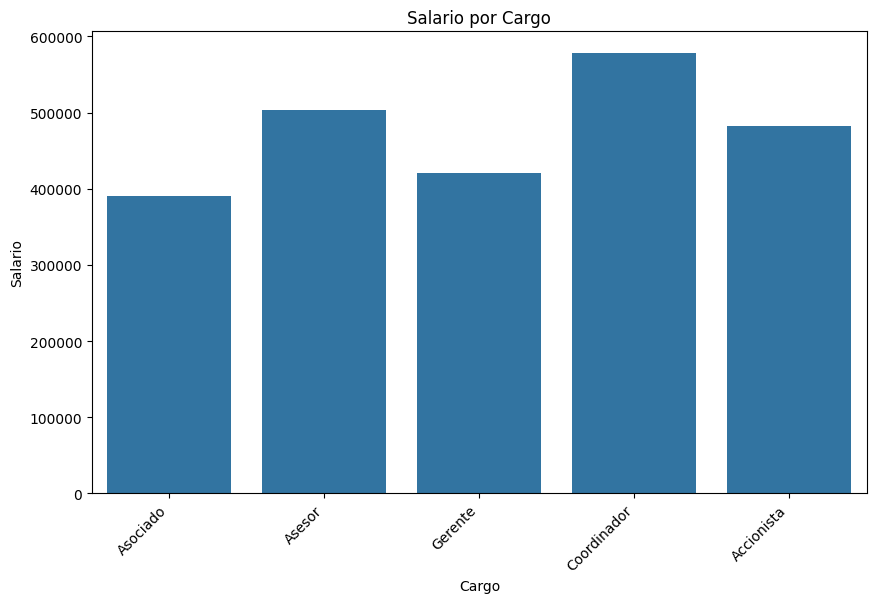

In [81]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Cargo', y='Salario', data=df_lider, errorbar=None)

plt.xticks(rotation=45, ha='right')

plt.title('Salario por Cargo')
plt.xlabel('Cargo')
plt.ylabel('Salario')

plt.show()

In [83]:
promedio_salario_por_cargo = df_lider.groupby('Cargo')['Salario'].mean().sort_values(ascending=False)

print(promedio_salario_por_cargo)

Cargo
Coordinador    577792.600000
Asesor         503252.375000
Accionista     482013.714286
Gerente        420753.785714
Asociado       391084.375000
Name: Salario, dtype: float64
